# Fight dataset 2008
## by Franz Tseng

## Preliminary Wrangling

> The data contains 2389217 rows of data and 29 features about fight information in the year of 2008 .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> The 2008.csv dataset is still too large considering the RAM i have, therefore, I removed 14 features, which I won't use for the analysis, and save the neww dataset with 15 features as "flight2008.csv" for later use.

In [2]:
variables = pd.read_csv("variable-descriptions.csv", header = 2, index_col=0)
variables

,Name,Description
1,Year,1987-2008
2,Month,12-Jan
3,DayofMonth,31-Jan
4,DayOfWeek,1 (Monday) - 7 (Sunday)
5,DepTime,"actual departure time (local, hhmm)"
6,CRSDepTime,"scheduled departure time (local, hhmm)"
7,ArrTime,"actual arrival time (local, hhmm)"
8,CRSArrTime,"scheduled arrival time (local, hhmm)"
9,UniqueCarrier,unique carrier code
10,FlightNum,flight number


In [20]:
variables.iloc[22, 1]

'reason for cancellation (A = carrier, B = weather, C = NAS, D = security)'

In [3]:
df = pd.read_csv("2008.csv")

In [3]:
df.shape

(2389217, 29)

In [4]:
# Delete features I am not interested to reduce the feature space and reduce RAM usage
df.drop(columns = ["Year", "DayofMonth", "ArrTime", "CRSArrTime", "FlightNum", "TailNum", 
                   "ActualElapsedTime", "CRSElapsedTime", "DepTime", "CRSDepTime", "Month",  
                   "DayOfWeek", "TaxiIn", "TaxiOut"], inplace=True)

In [5]:
df.shape

(2389217, 15)

In [6]:
df.to_csv("flight2008.csv", index=False)

In [2]:
df = pd.read_csv("flight2008.csv")

In [3]:
df.shape

(2389217, 15)

In [4]:
df.info()# the data type seems good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   UniqueCarrier      object 
 1   AirTime            float64
 2   ArrDelay           float64
 3   DepDelay           float64
 4   Origin             object 
 5   Dest               object 
 6   Distance           int64  
 7   Cancelled          int64  
 8   CancellationCode   object 
 9   Diverted           int64  
 10  CarrierDelay       float64
 11  WeatherDelay       float64
 12  NASDelay           float64
 13  SecurityDelay      float64
 14  LateAircraftDelay  float64
dtypes: float64(8), int64(3), object(4)
memory usage: 273.4+ MB


In [6]:
# explore the numerical columns
df.describe()

,Month,DayOfWeek,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2.389217e+06,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2.505009e+00,3.909625e+00,1.027357e+01,1.143636e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,1.121493e+00,1.980431e+00,3.963429e+01,3.653229e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,1.000000e+00,1.000000e+00,-9.100000e+01,-9.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+00,2.000000e+00,-9.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,4.000000e+00,6.000000e+00,1.500000e+01,1.100000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,4.000000e+00,7.000000e+00,2.461000e+03,2.467000e+03,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


In [7]:
# explore categorical columns
Cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
for i, col in enumerate(Cat_cols):
    print(Cat_cols[i], df[col].nunique())
# Origin and Dest columns have very high cardinality

UniqueCarrier 20
Origin 291
Dest 293
CancellationCode 4


In [8]:
# detect any missing values
df.isnull().mean()
# a very high proportion of data are missing in "CancellationCode", "CarrierDelay", "WeatherDelay", "NASDelay", 
# "SecurityDelay", and "LateAircraftDelay"

Month                0.000000
DayOfWeek            0.000000
UniqueCarrier        0.000000
ArrDelay             0.029338
DepDelay             0.026972
Origin               0.000000
Dest                 0.000000
Cancelled            0.000000
CancellationCode     0.973028
Diverted             0.000000
CarrierDelay         0.755324
WeatherDelay         0.755324
NASDelay             0.755324
SecurityDelay        0.755324
LateAircraftDelay    0.755324
dtype: float64

### What is the structure of your dataset?

> The modified dataset(flight2008.csv) has 15 columns, most of which are numerical. The 4 categorical columns are 'UniqueCarrier', 'Origin', 'Dest', and 'CancellationCode'. However, 'Month', 'DayOfWeek', 'Cancelled', 'Diverted' columns are actually categorcial coloumns.

### What is/are the main feature(s) of interest in your dataset?

> The major interest is to ingastigate what features are most related to flight changes(Delay, Cancellation, Diversion).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I speculate that location(Dest, Origin) and time in the year(Month) might be most related to delay(especially weather delay).
> I'm also curious about if certain carriers are prone to delay. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Categrorical Target variables

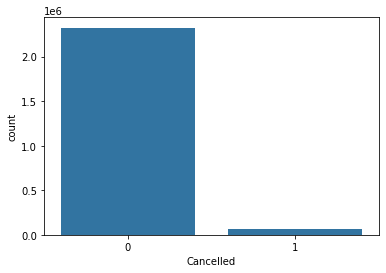

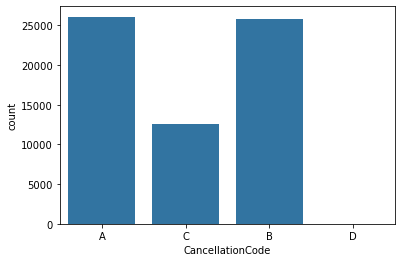

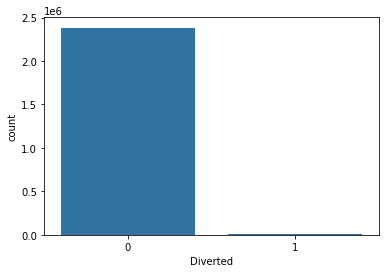

In [10]:
# the primary target of interest is if the flight is diverted, cancelled, or delayed. 
# I'll take a look at these categorical targets first
target1 = ["Cancelled", "CancellationCode", "Diverted"]
for var in target1:
    base_color = sb.color_palette()[0]
    fig, axes = plt.subplots()
    sb.countplot(data=df, x=var, color=base_color)

> Here we can see in "Diverted" and "Cancellation" columns, the data are highly imbalanced which make sense that most of the flights are not cancelled or diverted. As for the reason of cancellation, it looks like "Weather" and "Carrier" arer the major reason for cancellation

### Numerical target variables

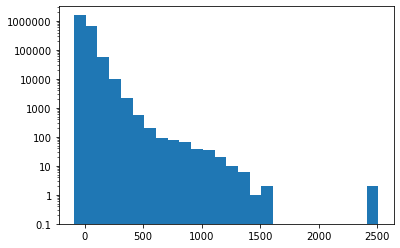

In [7]:
#target2 = ['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
# Then I'll explore other target variables
base_color = sb.color_palette()[0]
bins = np.arange(df.ArrDelay.min(), df.ArrDelay.max()+100, 100)
plt.hist(data=df, x='ArrDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

In [15]:
df.loc[df.ArrDelay > 2000]
# The data are highly skewed. At the very right side of the graph, I see outliers at aound 2500
# There are actually 2 outliers here with delay of 2461 min and 2453 min respectedly. 

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1018504,2,7,NW,2461.0,2457.0,HNL,MSP,0,NaN,0,1455.0,0.0,4.0,0.0,1002.0
2235384,4,4,NW,2453.0,2467.0,CLT,MSP,0,NaN,0,2436.0,0.0,0.0,0.0,17.0


In [23]:
df.loc[df.ArrDelay <= 0].shape[0]
# I also notice there are 1210094 rows of data are equal or smaller than 0 in this columns 
# which means the flight actually took off earlier or on time

1210094

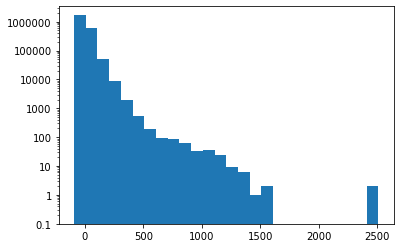

In [6]:
bins = np.arange(df.DepDelay.min(), df.DepDelay.max()+100, 100)
plt.hist(data=df, x='DepDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

In [16]:
df.loc[df.DepDelay > 2000]
# This column is extremely similar to 'ArrDelay' and the 2 outliers are the same data.
# From the numerical data description I can see that the statistics in the two columns are also very close.

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1018504,2,7,NW,2461.0,2457.0,HNL,MSP,0,NaN,0,1455.0,0.0,4.0,0.0,1002.0
2235384,4,4,NW,2453.0,2467.0,CLT,MSP,0,NaN,0,2436.0,0.0,0.0,0.0,17.0


In [24]:
df.loc[df.DepDelay <= 0].shape[0]
# Here is the same situation that 1331229 rows of data are smaller or equal 0 which means they were not delayed

1331229

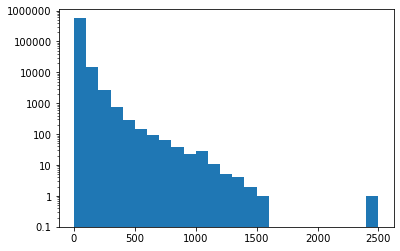

In [9]:
bins = np.arange(df.CarrierDelay.min(), df.CarrierDelay.max()+100, 100)
plt.hist(data=df, x='CarrierDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

In [29]:
df.loc[df.CarrierDelay == 0].shape[0]
# 325898 rows of data indicate the flight were on time 

325898

In [17]:
df.loc[df.CarrierDelay > 2000]
# This column is also very right skewed with one outliers which is one of the outliers in the previous twp columns 

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2235384,4,4,NW,2453.0,2467.0,CLT,MSP,0,NaN,0,2436.0,0.0,0.0,0.0,17.0


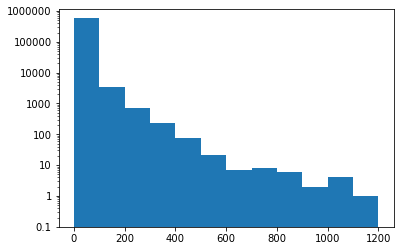

In [10]:
base_color = sb.color_palette()[0]
bins = np.arange(df.WeatherDelay.min(), df.WeatherDelay.max()+100, 100)
plt.hist(data=df, x='WeatherDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

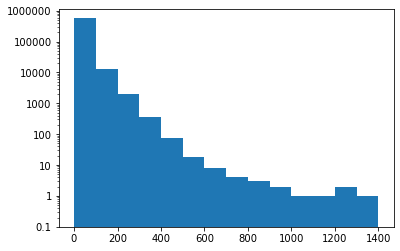

In [11]:
bins = np.arange(df.NASDelay.min(), df.NASDelay.max()+100, 100)
plt.hist(data=df, x='NASDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

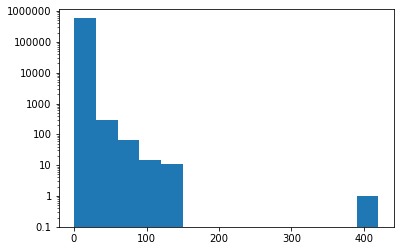

In [19]:
bins = np.arange(df.SecurityDelay.min(), df.SecurityDelay.max()+30, 30)
plt.hist(data=df, x='SecurityDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

In [20]:
df.loc[df.SecurityDelay > 300]
# One outlier of 392 is observed here.

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2116829,4,1,EV,392.0,405.0,SAT,ATL,0,NaN,0,0.0,0.0,0.0,392.0,0.0


In [21]:
df.loc[df.SecurityDelay == 0].shape

(581835, 15)

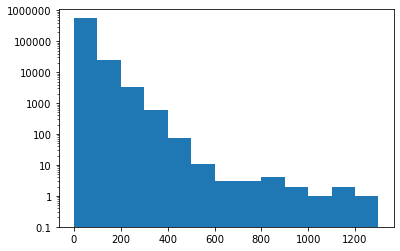

In [11]:
bins = np.arange(df.LateAircraftDelay.min(), df.LateAircraftDelay.max()+100, 100)
plt.hist(data=df, x='LateAircraftDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

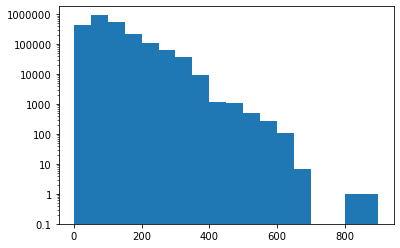

In [12]:
bins = np.arange(df.AirTime.min(), df.AirTime.max()+50, 50)
plt.hist(data=df, x='AirTime', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

In [19]:
df[df.AirTime > 800]
# two outliers with AirTime more than 800

,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1555950,HA,823.0,468.0,1.0,LAS,HNL,2762,0,NaN,0,468.0,0.0,0.0,0.0,0.0
2160496,HA,886.0,573.0,3.0,HNL,SEA,2677,0,NaN,0,573.0,0.0,0.0,0.0,0.0


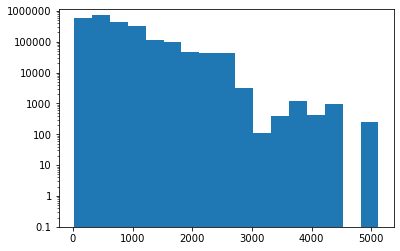

In [16]:
bins = np.arange(df.Distance.min(), df.Distance.max()+300, 300)
plt.hist(data=df, x='Distance', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

> For these numerical target variables, I noticed they are all right skewed even if I exclude the outliers. While these columns are highly right skewed, it shows that most of the flight are not delayed and have value of 0 or smaller. 
> From the previous analysis, I know 3/4 of the data are missing in 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', and 'LateAircraftDelay' columns. It's hard to know if these NaN mean no delay or simply not recorded because the column contains 0 that indicates on time.
<br>
<br>
AirTime and Distance columns are not as highly right skewed. However, the distribution is still favors less AirTime and shorter distance.

### Other features

In [24]:
other_feat = ['UniqueCarrier', 'Origin', 'Dest']
for k, i in enumerate(other_feat):
    print(other_feat[k], df[i].nunique())

UniqueCarrier 20
Origin 291
Dest 293


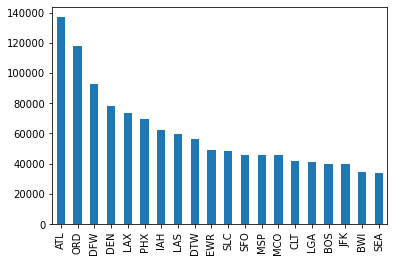

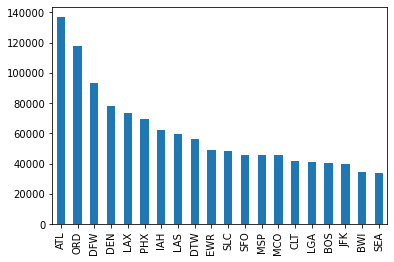

In [19]:
# Since the "Origin" and "Dest" have very high cardinarlity, I'll use only the top 20 for analysis
for i in ["Origin", "Dest"]:
    fig, ax = plt.subplots()
    df[i].value_counts().head(20).plot(kind="bar")

In [25]:
(df["Dest"].value_counts().index).equals(df["Origin"].value_counts().index) 

False

In [26]:
(df["Dest"].value_counts().head(20).index).equals(df["Origin"].value_counts().head(20).index)
# It looks like the "Origin", "Dest" columns have the same top 20 categories, and the counts of each locations are very similar

True

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

<AxesSubplot:>

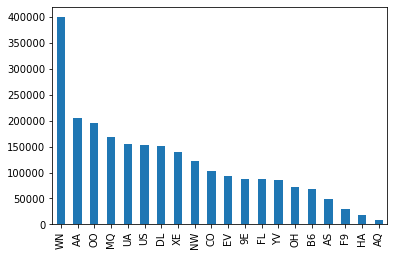

In [27]:
df["UniqueCarrier"].value_counts().plot(kind="bar")

<AxesSubplot:>

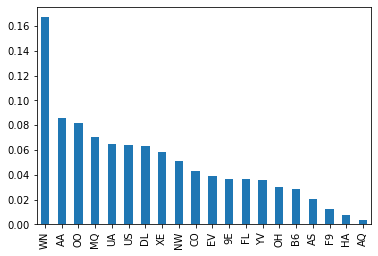

In [28]:
df["UniqueCarrier"].value_counts(normalize=True).plot(kind="bar")
# Southwest airline has the highest flight counts and is around twice of American airline

> The distributions of "Origin" and "Dest" are extremely similar.
<br>
<br>
The Southwest Airline has twice flights as much as American Airline which is at the second place and then the number of flight declines gradually.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The "Diverted" and "Cancellation" columns are very imbalanced as mentioned before, and it is completely normal since many flights could be delayed but only a few were diverted or cancelled.
<br>
> The numerical columns in all difference "Delay" columns in minutes are highly right skewed and harder to interpret. So I re-scale the y-axis with "log" to make it easy to see all the bins in the histogram. The right skewed shape completely makes sense because flights with longer delay should be much fewer than those with shorter delay. 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did notice outliers in the "ArrDelay", "DepDelay", "SecurityDelay", and "CarrierDelay". However, I didn't remove these data points becaue I am curious about what carrier or in what location these extreme delay occurred. Are they made by the same carrier or at the same location? What is the reason of the extreme delay if the data exist. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Carrier vs Diverted and Cancellation

In [3]:
df1 = df[['ArrDelay','DepDelay', 'Distance', 'AirTime', 'Origin', 'UniqueCarrier']]
df=0

In [4]:
df1.shape

(2389217, 3)

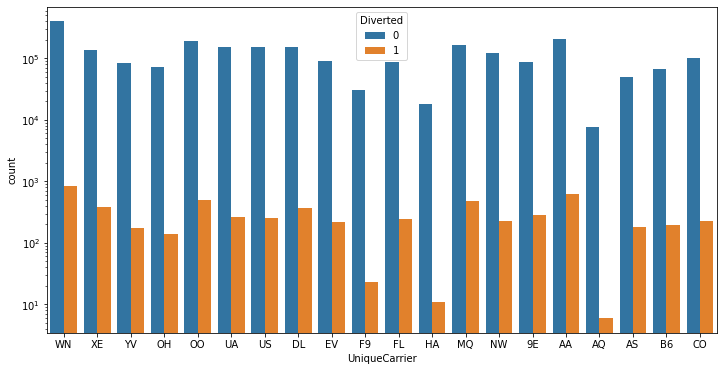

In [6]:
plt.figure(figsize=(12,6))
sb.countplot(data=df1, x="UniqueCarrier", hue="Diverted")
plt.yscale("log")

In [5]:
# the proportion of "Diverted"(which is 1 in the plot) is very small and hard to visualize, 
# rescaling with log along y-axis makes it easier to see, though might be misleading in terms of the real proportion
# I'll calculate the proportion of "Diverted" and plot it directly
df2 = df1.groupby(["UniqueCarrier", "Diverted"]).size().unstack()
df2['proportion'] = df2[1]/df1.UniqueCarrier.value_counts()

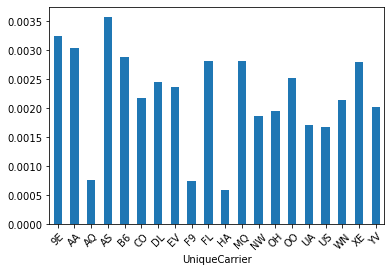

In [27]:
df2.proportion.plot(kind='bar')
plt.xticks(rotation=45);
# now it is pretty clear that Alaska Airline has the highest proportion of diversion and Hawaiian Airlines the lowest

<AxesSubplot:xlabel='UniqueCarrier', ylabel='count'>

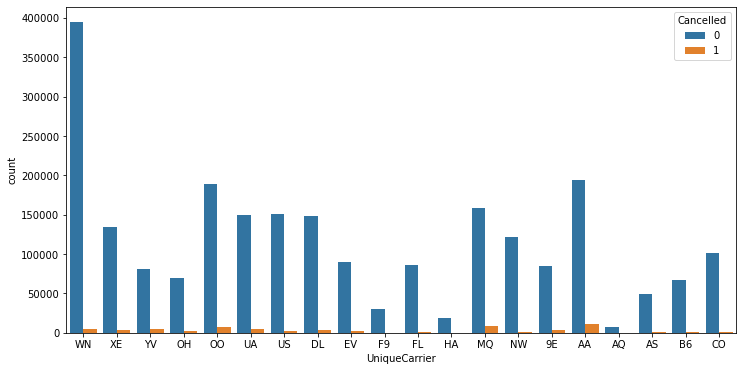

In [30]:
# Then I'll take a look at cancellation
plt.figure(figsize=(12,6))
sb.countplot(data=df1, x="UniqueCarrier", hue="Cancelled")

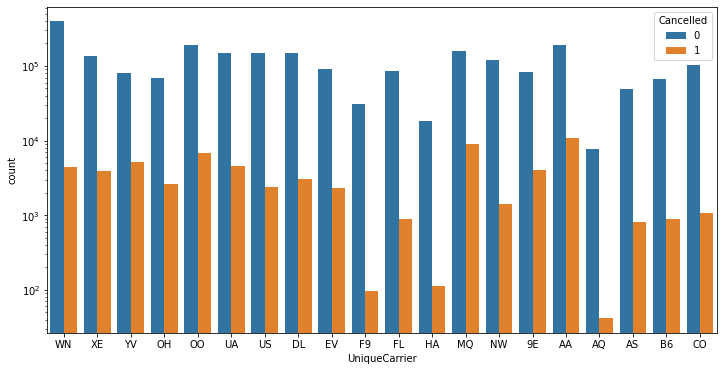

In [31]:
# again the proportion of cancellation is too small to interpret and misleading when rescaling y-axis with log
plt.figure(figsize=(12,6))
sb.countplot(data=df1, x="UniqueCarrier", hue="Cancelled")
plt.yscale("log")

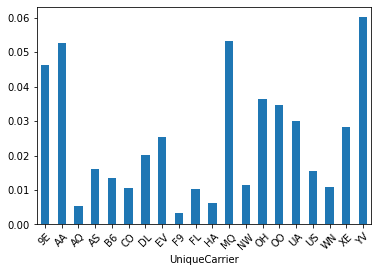

In [32]:
df2 = df1.groupby(["UniqueCarrier", "Cancelled"]).size().unstack()
df2['proportion'] = df2[1]/df1.UniqueCarrier.value_counts()
df2.proportion.plot(kind='bar')
plt.xticks(rotation=45);
# Mesa Airlines is the one with highest cacellation rate and Frontier Airlines the lowest

> From the above analysis, I found AS has the highest diversion rate and HA has the lowest.The diversion rate for AQ, F9, and, HA are pretty low which are lower than 0.1% while 9E, AA, and AS have diversion rate higher than 0.3%, and that is 3 times higher than that of the lowest group.
<br>
<br>
> The cancellation rate is slightly difference than diversion rate while YV has the highest rate and F9 has the lowest. I noticed that AQ, F9, and HA, the same as the lowest diversion rate group, are the airlines with least frequent concellation. YV, MQ, AA all have cancellation rate higher than 5%(9E is among the highest group, its cancellation rate is slightly lower than 5% though).
<br>
<br>
> In terms of diversion rate and cancellation rate. AA (perhaps 9E) is in the highest frequency group. 

### Distance/AirTime vs Delay

<AxesSubplot:xlabel='Distance', ylabel='AirTime'>

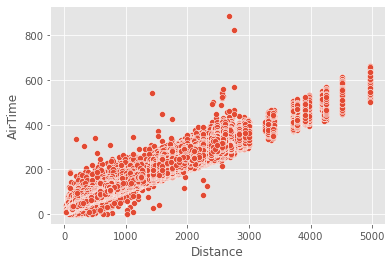

In [60]:
sb.scatterplot(data=df1, x="Distance", y="AirTime")
# AirTime and Distance clearly has linear relationship as expected. 
# Interestingly, the plot looks like a "band" instead of a "line" which implies 
# there is wide variation among flights with the same flying distance. 

<AxesSubplot:xlabel='Distance', ylabel='ArrDelay'>

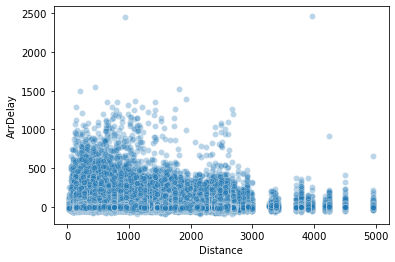

In [11]:
sb.scatterplot(data=df1, x="Distance", y="ArrDelay", x_jitter=0.5, alpha=0.3)

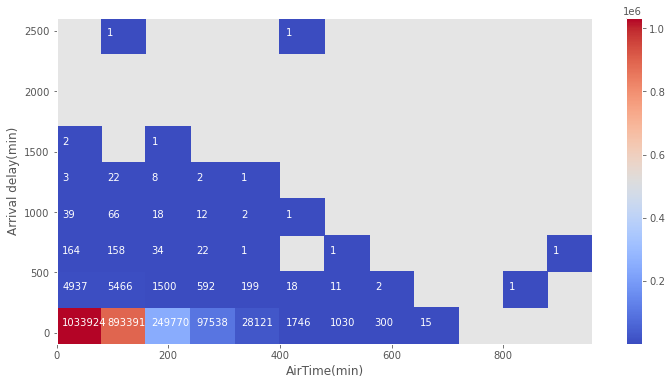

In [58]:
plt.figure(figsize=(12,6))
bins_y = np.arange(df1.ArrDelay.min(), df1.ArrDelay.max()+300, 300)
bins_x = np.arange(df1.AirTime.min(), df1.AirTime.max()+80, 80)
h2d = plt.hist2d(data=df1.dropna(subset=["ArrDelay"]), x="AirTime", y="ArrDelay", bins = [bins_x, bins_y], cmin=0.5, cmap="coolwarm")
plt.colorbar()
plt.xlabel("AirTime(min)")
plt.ylabel("Arrival delay(min)");
counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c > 0:
            plt.text(bins_x[i]+10, bins_y[j]+150, int(c),
            color = 'white')

> Comparing "ArrDelay vs Distance" and "ArrDelay vs AirTime", it is obvious that no linear relationship is observed. Most of the flight delay are within around 500 minutes and are not longer when the airtime or distance become longer.
<br>
> I can also identify a few outliers which were recognized in univariate analysis.

### Origin/UniqueCarrier vs DepDelay

In [35]:
top20_ind = df1.Origin.value_counts().head(20).index
top20 = df1.loc[df1.Origin.isin(top20_ind)]

<AxesSubplot:xlabel='Origin', ylabel='DepDelay'>

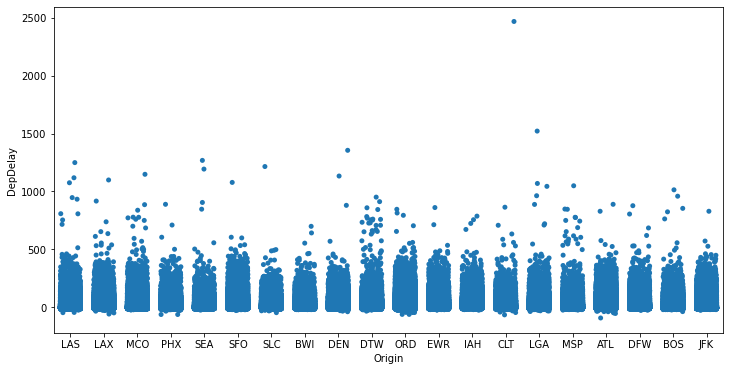

In [6]:
plt.figure(figsize=(12,6))
base_color = sb.color_palette()[0]
sb.stripplot(data=top20, x="Origin", y="DepDelay", jitter=0.3, color=base_color)
# one single outliers in "CLT" interferes with the interpretation of the plot, I'll remove it and plot again

In [7]:
mask1 = (top20.Origin=="CLT")
mask2 = (top20.DepDelay > 2000)

<AxesSubplot:xlabel='Origin', ylabel='DepDelay'>

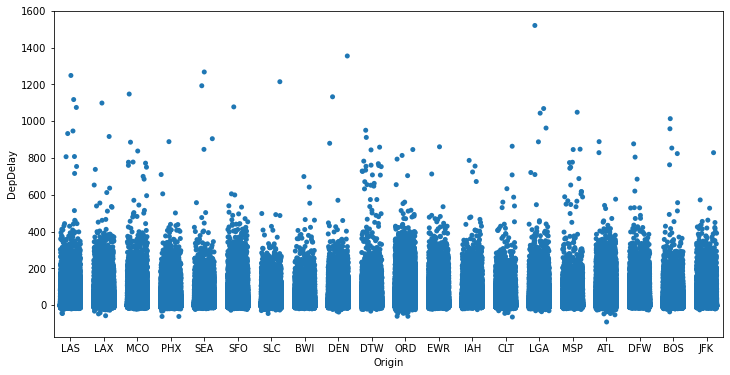

In [8]:
# remove outlier
plt.figure(figsize=(12,6))
sb.stripplot(data=top20.loc[~(mask1 & mask2)], x="Origin", y="DepDelay", jitter=0.3, color=base_color)
# After removing the outlier, it is noted that most of the flight delay are within 400 minutes, however, 
#the data points are still too condensed to visualize.

<AxesSubplot:xlabel='Origin', ylabel='DepDelay'>

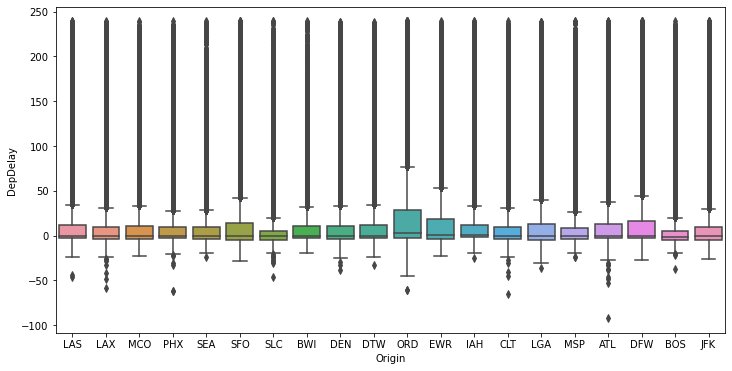

In [44]:
# So I take a look at the boxplot of flights from these airport with delay less than 4 hours
mask  = top20.DepDelay < 240
plt.figure(figsize=(12,6))
sb.boxplot(data=top20.loc[mask], x="Origin", y="DepDelay")
# it seems the median delay are no big difference with only 
# flights in ORD has slightly higher median delay time and wider IQR, however, 
# there are too many outliers that make it hard to interpret.

<Figure size 720x432 with 0 Axes>

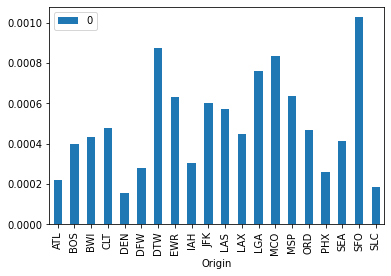

In [46]:
# I'd like to see the proportion of extreme delay(>6 hours) in all the airport 
plt.figure(figsize=(10,6))
mask  = top20.DepDelay > 360
extreme_delay_proportion = pd.DataFrame((top20.loc[mask].groupby("Origin").size()) / (top20.groupby("Origin").size()))
extreme_delay_proportion.plot(kind='bar');
# it is easier to visualize now. Even though the departure delay < 4 hours in all the airport seem to be similar, 
# the proportion of delay shows something. I see more frequent delay in DTW, LGA, MCO, and SFO 
# while SFO has the highest frequency of extreme delay. 

<AxesSubplot:xlabel='UniqueCarrier', ylabel='DepDelay'>

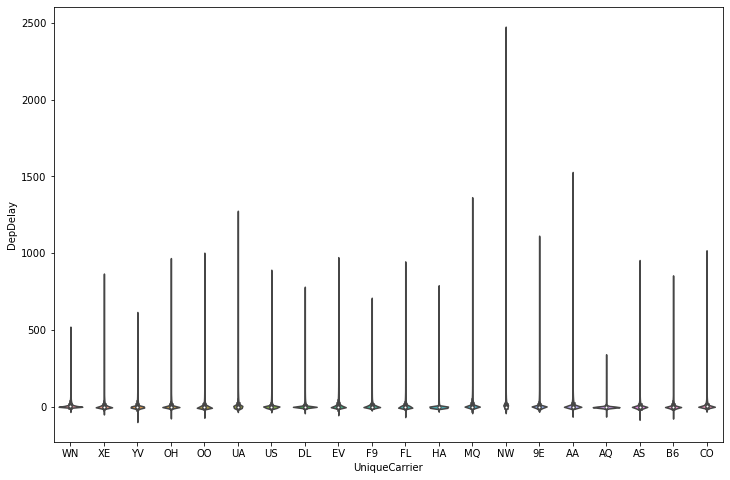

In [11]:
plt.figure(figsize=(12,8))
sb.violinplot(data=df1, x="UniqueCarrier", y="DepDelay")
# too many outliers to interpret the plot

<AxesSubplot:xlabel='UniqueCarrier', ylabel='DepDelay'>

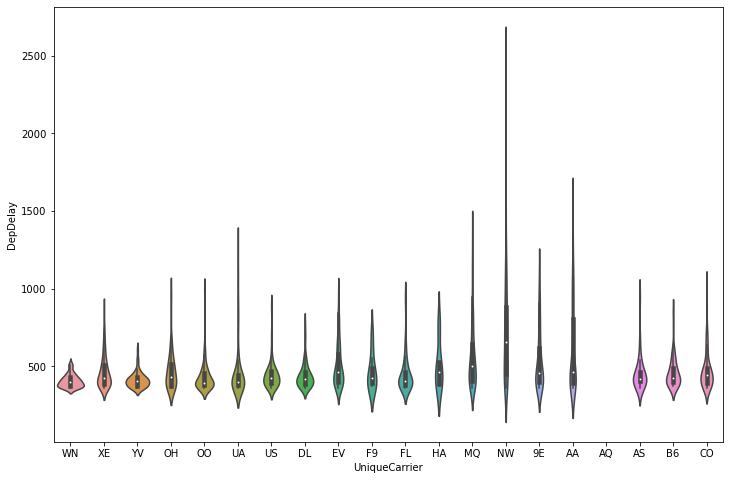

In [5]:
# analyze only flight with delay time > 6 hours
mask = df1.DepDelay < 360
plt.figure(figsize=(12,8))
sb.violinplot(data=df1.loc[~mask], x="UniqueCarrier", y="DepDelay")
# NW has higher median delay time than other carriers in those flights delay more than 6 hours.
# AQ has more flight delay more than 6 hours

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I start with exploring the relationship between carrier and the instances of cancellation and diversion. Airlines with lower diversion rate are AQ, F9, and HA while AS, 9E, AA, B6, FL, MQ, OO, and XE are among the high diversion group. When I examine the cancellation rate, again, AQ, F9, and HA have the lowest cancellation rate. On the other hand, 9E, AA, MQ, YV have the highest cancellation rate. What is intersting is that the three airlines AQ, HA, and  F9 are in the group with both low cancellation and diversion, and AA, 9E seem to more frequently cencel or divert the flights. 
<br>
<br>

> Next, I thought about if the departure airport or specific carrier related to more departure delay. In the plot, I don't anything dramatic, most of the median delay time are at around 0 which means on-time. Since there are too many outliers in the plot, I decided to see data points exceeding 6 hours of delay. When they are transformed to a proportion bar plot, things became more clear that DTW, SFO, MCO, LGA have more frequent extreme delay than other airport. Den is the best in terms of the frequency of extreme delay.
<br>
<br>
In the analysis of carrier vs departure delay, the situation is similar. Large amount of outliers make it hard to explain the results. As I analyzed only the extreme delay(> 6 hours) flights, I noticed no data point is in AQ category while NW has higher median delay time in minutes.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> At first I didn't intend to analyze distance and airtime, while I wanted to find something numerical to numerical, 3 numerical variables, distance, airtime, and arrival delay were analyzed. As expected, distance and airtime are perfectly linear related, however, there are wide variation with respect to airtime in the flights flying the same distance. As I examine the relationship between "airtime/arrival delay" and "distance/arrival delay", I don't see obvious relationship. Most of the data points cluster at the left lower area in the plot. So with current data, it implies longer distance or longer airtime do not necessarily mean more arrival delay time.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [3]:
df2 = df[['UniqueCarrier','ArrDelay', 'CancellationCode', 'Origin','CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepDelay']]
df=0

In [7]:
df2.head()

,UniqueCarrier,ArrDelay,CancellationCode,Origin,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Diverted
0,WN,16.0,NaN,HOU,16.0,0.0,0.0,0.0,0.0,0
1,WN,2.0,NaN,HOU,NaN,NaN,NaN,NaN,NaN,0
2,WN,-4.0,NaN,HOU,NaN,NaN,NaN,NaN,NaN,0
3,WN,-2.0,NaN,HOU,NaN,NaN,NaN,NaN,NaN,0
4,WN,16.0,NaN,HOU,16.0,0.0,0.0,0.0,0.0,0


In [5]:
#df2=pd.melt(df, id_vars=['UniqueCarrier', 'Origin'], value_vars=['CarrierDelay',
#       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], var_name="Reason_for_delay", value_name='minutes')

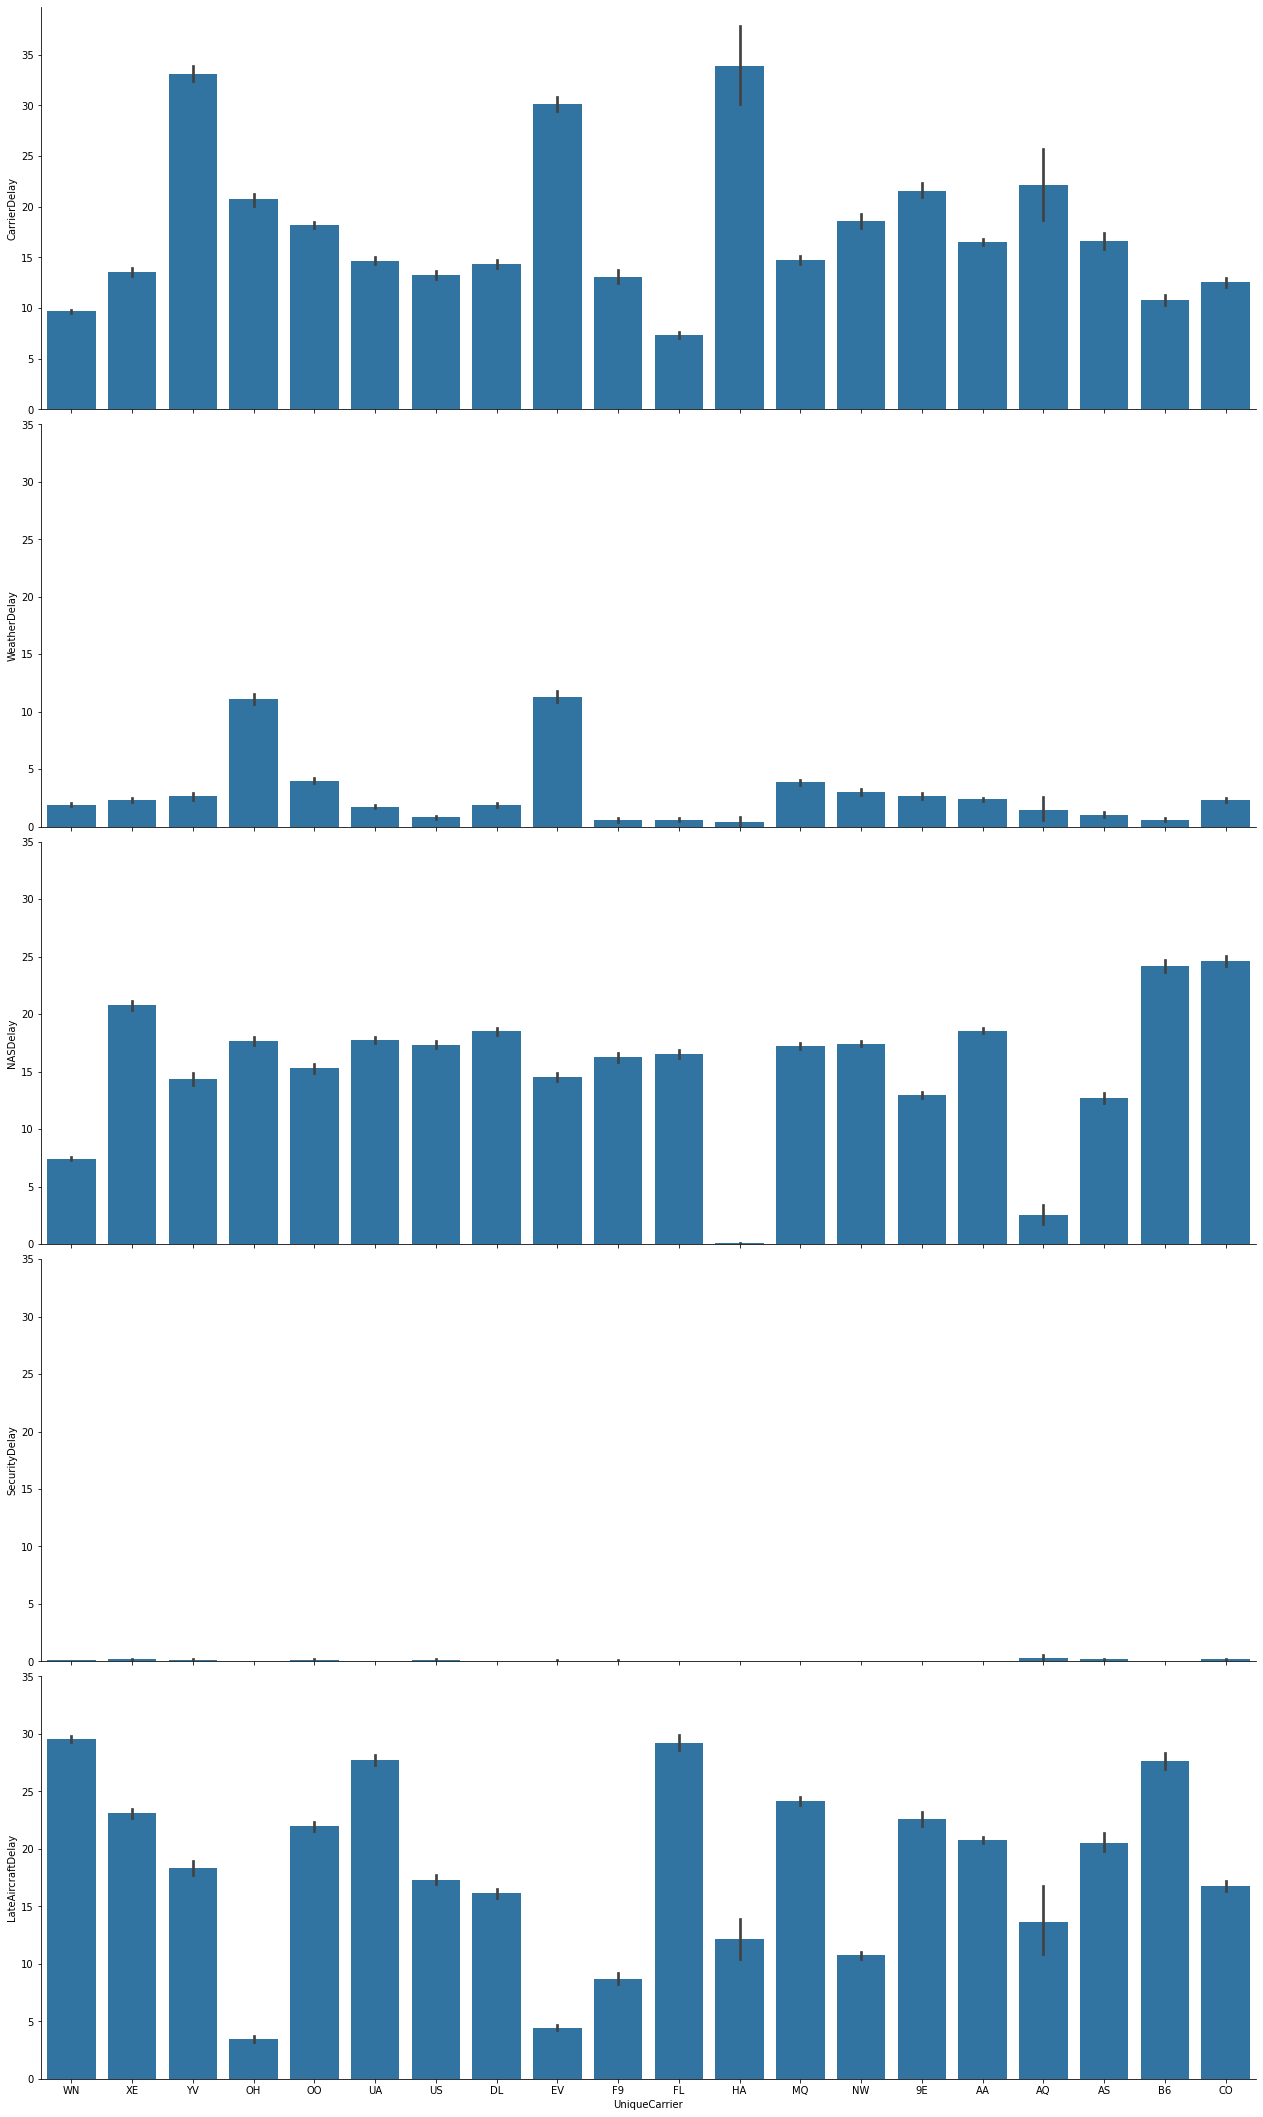

In [9]:
base_color = sb.color_palette()[0]
yticks = np.arange(0, 40, 5)
g = sb.PairGrid(data = df2, x_vars = ['UniqueCarrier'],
                y_vars = ['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], 
                aspect=3, height=6, dropna=True)
g.map(sb.barplot, color=base_color)
g.set(yticks=yticks, yticklabels=yticks)

D:\Udemy\envs\my_env\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


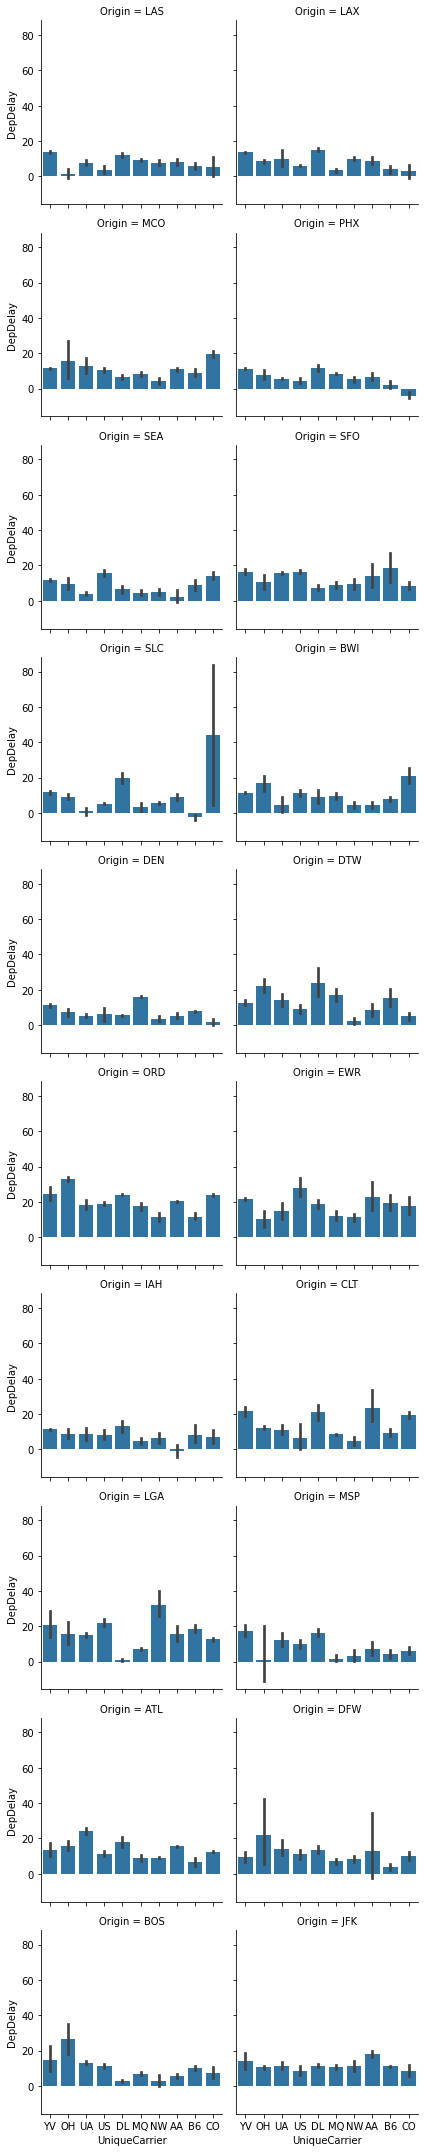

In [5]:
top20_ind = df2.Origin.value_counts().head(20).index
top20 = df2.loc[df2.Origin.isin(top20_ind)]
g = sb.FacetGrid(data=top20, col="Origin", col_wrap=2)
g.map(sb.barplot, "UniqueCarrier", "DepDelay")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!